In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [20]:
data = pd.read_csv('USA Housing Dataset.csv')

In [21]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [22]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


In [23]:
duplikaty = data[data.duplicated(subset=['statezip'], keep=False)]

print(duplikaty)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-09 00:00:00  3.760000e+05       3.0       2.00         1340   
1     2014-05-09 00:00:00  8.000000e+05       4.0       3.25         3540   
2     2014-05-09 00:00:00  2.238888e+06       5.0       6.50         7270   
3     2014-05-09 00:00:00  3.240000e+05       3.0       2.25          998   
4     2014-05-10 00:00:00  5.499000e+05       5.0       2.75         3060   
...                   ...           ...       ...        ...          ...   
4135  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4136  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4137  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4138  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4139  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0       

In [ ]:
statezip_seattle = data[data['city'] == 'Seattle']['statezip']

# Wyświetlenie wyników
print("statezip dla Seattle:")
print(statezip_seattle)

r = data[data['city'] == 'Renton']['statezip']

# Wyświetlenie wyników
print("statezip dla r:")
print(r)
print("re same ")


statezip dla Seattle:
0       WA 98103
3       WA 98117
4       WA 98146
6       WA 98103
8       WA 98136
          ...   
4122    WA 98115
4125    WA 98103
4131    WA 98126
4135    WA 98133
4138    WA 98178
Name: statezip, Length: 1415, dtype: object
statezip dla r:
33      WA 98058
37      WA 98058
84      WA 98058
94      WA 98056
111     WA 98058
          ...   
4078    WA 98058
4090    WA 98058
4128    WA 98056
4130    WA 98058
4137    WA 98059
Name: statezip, Length: 261, dtype: object
re same 


KeyError: 'statezip'

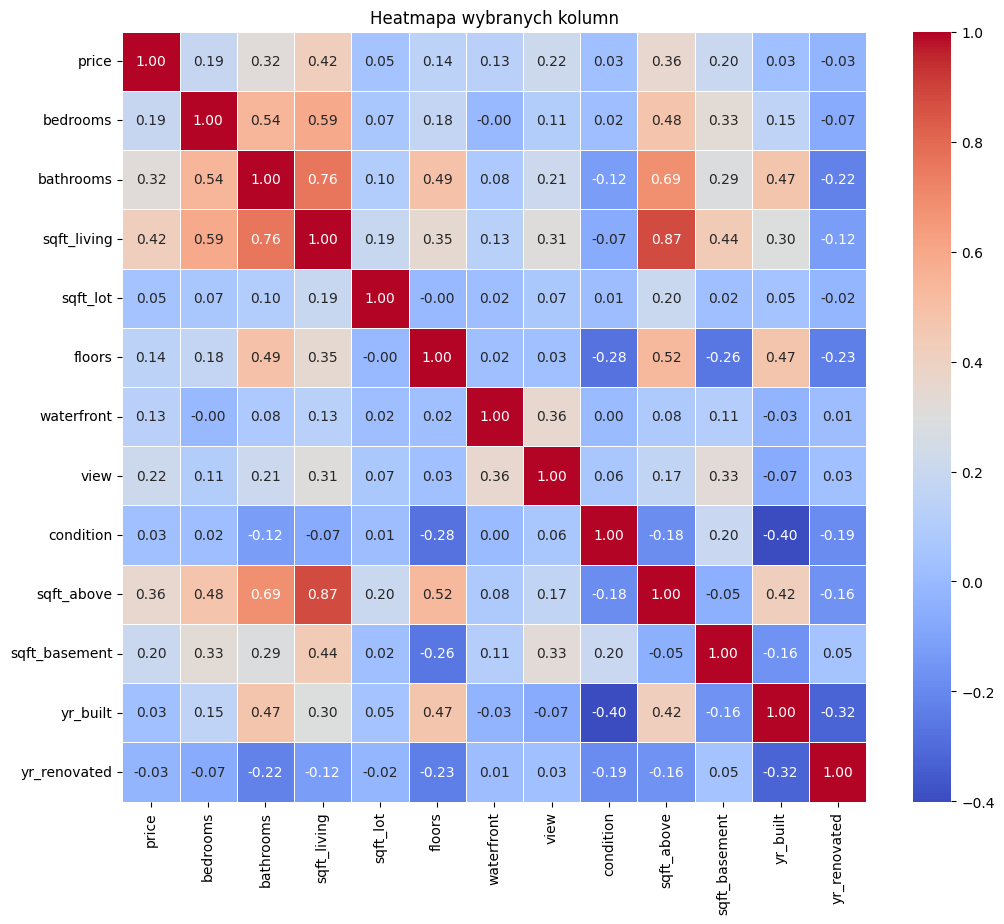

In [25]:
selected_columns = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
    'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 
    'yr_built', 'yr_renovated'
]
filtered_data = data[selected_columns]


correlation_matrix = filtered_data.corr()


plt.figure(figsize=(12, 10))  # Dopasuj rozmiar wykresu
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmapa wybranych kolumn")
plt.show()

In [26]:

df = pd.get_dummies(data, columns=['city', 'statezip'], drop_first=True)
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,...,False,False,False,False,False,False,False,False,False,False
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,...,False,False,False,False,False,False,False,False,False,False
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,...,False,False,False,False,False,False,False,False,False,False
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,...,False,False,False,False,False,False,False,False,False,False
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,...,False,False,False,False,False,False,False,False,False,False


In [29]:
data.isnull().sum()  # Sprawdź brakujące wartości


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
data[num_columns] = scaler.fit_transform(data[num_columns])


In [31]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,0.014141,0.375,0.296296,0.100310,0.000695,0.8,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,0.030086,0.500,0.481481,0.327818,0.147909,0.4,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,0.084200,0.625,0.962963,0.713547,0.120512,0.4,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,0.012185,0.375,0.333333,0.064943,0.000248,0.4,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,0.020681,0.625,0.407407,0.278180,0.005940,0.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [32]:

data = pd.get_dummies(data, columns=['city', 'statezip'], drop_first=True)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,2014-05-09 00:00:00,0.014141,0.375,0.296296,0.100310,0.000695,0.8,0,0,3,...,False,False,False,False,False,False,False,False,False,False
1,2014-05-09 00:00:00,0.030086,0.500,0.481481,0.327818,0.147909,0.4,0,0,3,...,False,False,False,False,False,False,False,False,False,False
2,2014-05-09 00:00:00,0.084200,0.625,0.962963,0.713547,0.120512,0.4,0,0,3,...,False,False,False,False,False,False,False,False,False,False
3,2014-05-09 00:00:00,0.012185,0.375,0.333333,0.064943,0.000248,0.4,0,0,3,...,False,False,False,False,False,False,False,False,False,False
4,2014-05-10 00:00:00,0.020681,0.625,0.407407,0.278180,0.005940,0.0,0,0,5,...,False,False,False,False,False,False,False,False,False,False


In [36]:
data.drop(['country'], axis='columns', inplace= True)

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 	

num_columns = ['sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
data[num_columns] = scaler.fit_transform(data[num_columns])


zmienianie formatu daty na kolumne 

In [43]:
import pandas as pd



# Konwersja kolumny na format datetime
data['date'] = pd.to_datetime(data['date'])

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek
data['quarter'] = data['date'].dt.quarter


data = data.drop(columns=['date'])

# Wyświetlanie przekształconych danych
print(data)


         price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     0.014141     0.375   0.296296     0.100310  0.000695     0.8   
1     0.030086     0.500   0.481481     0.327818  0.147909     0.4   
2     0.084200     0.625   0.962963     0.713547  0.120512     0.4   
3     0.012185     0.375   0.333333     0.064943  0.000248     0.4   
4     0.020681     0.625   0.407407     0.278180  0.005940     0.0   
...        ...       ...        ...          ...       ...     ...   
4135  0.011590     0.375   0.259259     0.117890  0.005330     0.0   
4136  0.020095     0.375   0.370370     0.112720  0.006460     0.4   
4137  0.015679     0.375   0.370370     0.273009  0.005939     0.4   
4138  0.007649     0.500   0.296296     0.177870  0.005581     0.0   
4139  0.008296     0.375   0.370370     0.115822  0.006952     0.4   

      waterfront  view  condition  sqft_above  ...  statezip_WA 98188  \
0              0     0          3    0.126797  ...              False   
1            

In [47]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['price','street'])  # Wszystkie kolumny poza 'price'
y = data['price']                 # Cena jako zmienna zależna

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


REGRESJA LINIOWA 

In [48]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Ocena modelu
y_pred = model_lr.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


MSE: 7.01929083224888e-05
R2 Score: 0.5266070690342728


DRZEWO DECYZJNE

In [49]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# Ocena modelu
y_pred = model_dt.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


MSE: 0.00010963433468415889
R2 Score: 0.26060737087334196


RANDOM FOREST

In [50]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42, n_estimators=100)
model_rf.fit(X_train, y_train)

# Ocena modelu
y_pred = model_rf.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


MSE: 7.043546569269248e-05
R2 Score: 0.5249712208103963


GRADIENT BOOST

In [ ]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train, y_train)

# Ocena modelu
y_pred = model_xgb.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


MSE: 0.00010635182340887574
R2 Score: 0.282745186083892


REGRESJA GRZBIETOWA

In [54]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

# Ocena modelu
y_pred = model_ridge.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 6.820185349711873e-05
R2 Score: 0.540035081949267


REGRESJA LASSO

In [55]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train)

# Ocena modelu
y_pred = model_lasso.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 0.0001487537708508056
R2 Score: -0.003220770561886077


In [56]:
import streamlit as st

# Nagłówek
st.title("Predykcja cen nieruchomości")

# Wprowadź dane
bedrooms = st.number_input("Liczba sypialni")
bathrooms = st.number_input("Liczba łazienek")
sqft_living = st.number_input("Powierzchnia mieszkalna (sqft)")
sqft_lot = st.number_input("Powierzchnia działki (sqft)")
floors = st.number_input("Liczba pięter")

# Prognozowanie
if st.button("Oblicz cenę"):
    input_data = pd.DataFrame([[bedrooms, bathrooms, sqft_living, sqft_lot, floors]], 
                              columns=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors'])
    input_data = scaler.transform(input_data)  # Skalowanie
    prediction = model_rf.predict(input_data)
    st.write(f"Przewidywana cena: ${prediction[0]:,.2f}")


2025-01-18 17:17:12.918 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-18 17:17:13.056 
  command:

    streamlit run C:\Users\Jakub\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-18 17:17:13.056 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-18 17:17:13.057 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-18 17:17:13.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-18 17:17:13.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-18 17:17:13.059 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-18 17:17:13.059 Sess